<a href="https://colab.research.google.com/github/dhrubjun/All-time-best-IPL-team/blob/main/All_time_best_IPL_team.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The team team will consists of 12 player (1 extra player). 
It will have -
1. 5 Batsman
2. 1 Wicket keeper batsman
3. 1 all rounder
4. 4 bowlers (2 spinners and 2 pacers)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path = "/content/drive/MyDrive/data/IPL Ball-by-Ball 2008-2020.csv"
df = pd.read_csv(path)


In [5]:
df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


Selection of batsman will be on following criteria-
1. Batting Avg.

In [48]:
df_total_run = df.groupby('batsman').sum().sort_values(by='batsman_runs', ascending=False)['batsman_runs']

In [56]:
df_total_ball_faced = df.groupby('batsman').count().sort_values(by='batsman_runs', ascending=False)['batsman_runs']

In [47]:
total_out = df[df['is_wicket']==1].groupby('batsman').count().sort_values(by='is_wicket', ascending=False)['is_wicket']

In [54]:
df_batsman = pd.concat([df_total_run,total_out], axis=1)

In [57]:
df_batsman['Total balls faced'] = df_total_ball_faced

In [58]:
df_batsman.head(10)

,batsman_runs,is_wicket,Total balls faced
V Kohli,5878,163.0,4609
SK Raina,5368,160.0,4041
DA Warner,5254,126.0,3819
RG Sharma,5230,177.0,4088
S Dhawan,5197,152.0,4208
AB de Villiers,4849,114.0,3264
CH Gayle,4772,116.0,3342
MS Dhoni,4632,126.0,3493
RV Uthappa,4607,169.0,3658
G Gambhir,4217,135.0,3524


In [61]:
df_batsman['Average'] = round(df_batsman['batsman_runs']/df_batsman['is_wicket'], 2)

In [62]:
df_batsman.head(10)

,batsman_runs,is_wicket,Total balls faced,Average
V Kohli,5878,163.0,4609,36.06
SK Raina,5368,160.0,4041,33.55
DA Warner,5254,126.0,3819,41.70
RG Sharma,5230,177.0,4088,29.55
S Dhawan,5197,152.0,4208,34.19
AB de Villiers,4849,114.0,3264,42.54
CH Gayle,4772,116.0,3342,41.14
MS Dhoni,4632,126.0,3493,36.76
RV Uthappa,4607,169.0,3658,27.26
G Gambhir,4217,135.0,3524,31.24


In [63]:
df_batsman['Strike Rate'] = round((df_batsman['batsman_runs']/df_batsman['Total balls faced'])* 100 , 2)

In [64]:
df_batsman.head(20)

,batsman_runs,is_wicket,Total balls faced,Average,Strike Rate
V Kohli,5878,163.0,4609,36.06,127.53
SK Raina,5368,160.0,4041,33.55,132.84
DA Warner,5254,126.0,3819,41.70,137.58
RG Sharma,5230,177.0,4088,29.55,127.94
S Dhawan,5197,152.0,4208,34.19,123.50
AB de Villiers,4849,114.0,3264,42.54,148.56
CH Gayle,4772,116.0,3342,41.14,142.79
MS Dhoni,4632,126.0,3493,36.76,132.61
RV Uthappa,4607,169.0,3658,27.26,125.94
G Gambhir,4217,135.0,3524,31.24,119.67


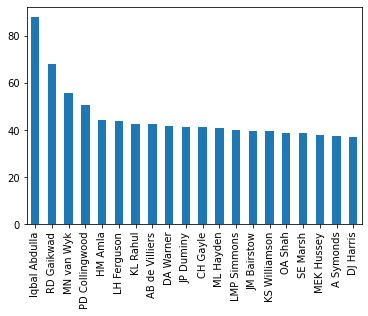

In [74]:
df_batsman.sort_values(by='Average', ascending=False).head(20)['Average'].plot(kind='bar')